In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

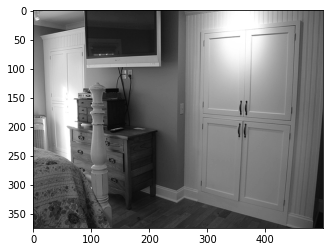

In [3]:
DATADIR = "/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/train/"

CATEGORIES = ["bed", "bear","bicycle"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  
        plt.show() 

        break  
    break  

In [4]:

print(img_array.shape)

(375, 500)


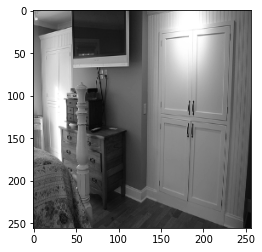

In [5]:
IMG_SIZE = 256

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
from tqdm import tqdm
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  
            except Exception as e:  
                pass
           

create_training_data()

print(len(training_data))

100%|██████████| 672/672 [00:10<00:00, 62.24it/s] 

2016


In [7]:
print(len(training_data))

2016


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:30]:
    print(sample[1])

1
0
2
2
1
2
0
2
2
0
0
1
1
1
0
0
0
0
1
0
2
0
2
0
1
0
2
2
0
1


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[139]
   [127]
   [134]
   ...
   [ 79]
   [108]
   [106]]

  [[127]
   [131]
   [134]
   ...
   [106]
   [125]
   [107]]

  [[118]
   [126]
   [142]
   ...
   [105]
   [128]
   [ 84]]

  ...

  [[114]
   [112]
   [101]
   ...
   [110]
   [110]
   [113]]

  [[109]
   [ 99]
   [119]
   ...
   [111]
   [122]
   [ 98]]

  [[136]
   [132]
   [109]
   ...
   [113]
   [105]
   [ 88]]]]


In [11]:
import pickle

pickle_out = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/y.pickle","rb")
y = pickle.load(pickle_in)

In [13]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(256,(3,3),activation='relu',input_shape=(X.shape[1:])),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(256,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Conv2D(128,(3,3),activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                                tf.keras.layers.MaxPool2D(2,2),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(512,activation='relu'),
                                tf.keras.layers.Dropout(0.5),
                                tf.keras.layers.Dense(3,activation='softmax')])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 256)     590080    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [15]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer= RMSprop(),
              metrics=['accuracy'])
              

In [16]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X.shape)
y = np.array(y).reshape(-1,1)
print(y.shape)
train =tf.keras.utils.to_categorical(y, 3)

(2016, 256, 256, 1)
(2016, 1)


In [17]:
print(y[0])

[1]


In [18]:
model_fit=model.fit(X, y, steps_per_epoch=64, epochs=15)

Epoch 1/15
64/64 [==============================] - 38s 392ms/step - loss: 154.4869 - accuracy: 0.3608
Epoch 2/15
64/64 [==============================] - 26s 399ms/step - loss: 3.7245 - accuracy: 0.3623
Epoch 3/15
64/64 [==============================] - 26s 401ms/step - loss: 2.5963 - accuracy: 0.3726
Epoch 4/15
64/64 [==============================] - 25s 394ms/step - loss: 1.3113 - accuracy: 0.4653
Epoch 5/15
64/64 [==============================] - 25s 388ms/step - loss: 1.0216 - accuracy: 0.5684
Epoch 6/15
64/64 [==============================] - 25s 388ms/step - loss: 0.8720 - accuracy: 0.6460
Epoch 7/15
64/64 [==============================] - 25s 388ms/step - loss: 0.7653 - accuracy: 0.6997
Epoch 8/15
64/64 [==============================] - 25s 386ms/step - loss: 0.7225 - accuracy: 0.7397
Epoch 9/15
64/64 [==============================] - 25s 387ms/step - loss: 0.6271 - accuracy: 0.7778
Epoch 10/15
64/64 [==============================] - 25s 388ms/step - loss: 0.5260 - accu

64/64 [==============================] - 19s 300ms/step - loss: 0.3152 - accuracy: 0.9158


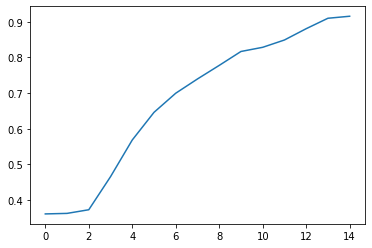

In [19]:
plt.plot(model_fit.history['accuracy'],label='train')

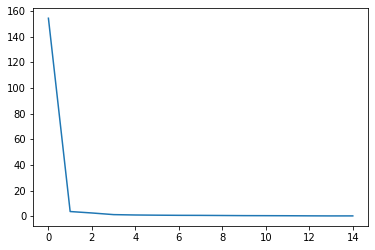

In [20]:
plt.plot(model_fit.history['loss'],label='train')


In [21]:
print(X[0].shape)

(256, 256, 1)


In [22]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

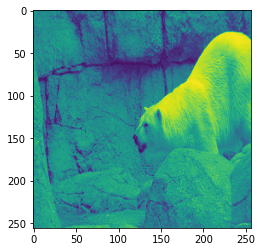

In [23]:
plt.imshow(X[0][:,:,0])

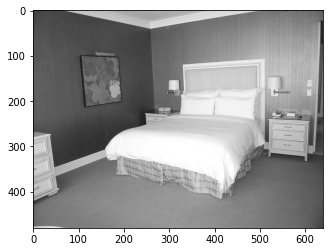

In [24]:
DATADIR = "/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/test/"

CATEGORIES = ["bed", "bear","bicycle"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  
        plt.show() 

        break 
    break  

In [25]:
from tqdm import tqdm
test_data = []

def create_test_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)):  
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                test_data.append([new_array, class_num]) 
            except Exception as e:  
                pass
            

create_test_data()

print(len(test_data))

100%|██████████| 326/326 [00:04<00:00, 80.47it/s] 

788


In [26]:
print(len(test_data))

788


In [27]:
import random

random.shuffle(test_data)

In [28]:
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

print(X_test[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 91]
   [ 59]
   [ 25]
   ...
   [ 41]
   [ 41]
   [ 42]]

  [[ 62]
   [ 30]
   [ 19]
   ...
   [ 41]
   [ 42]
   [ 42]]

  [[109]
   [ 68]
   [ 59]
   ...
   [ 43]
   [ 42]
   [ 41]]

  ...

  [[164]
   [167]
   [166]
   ...
   [ 74]
   [ 85]
   [ 79]]

  [[170]
   [165]
   [166]
   ...
   [ 83]
   [ 75]
   [ 76]]

  [[166]
   [164]
   [164]
   ...
   [ 78]
   [ 82]
   [ 81]]]]


In [29]:
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X_test.shape)
y_test = np.array(y_test).reshape(-1,1)
print(y_test.shape)
train =tf.keras.utils.to_categorical(y_test, 3)

(788, 256, 256, 1)
(788, 1)


In [30]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 5s 212ms/step - loss: 1.2716 - accuracy: 0.6942


[1.2715625762939453, 0.6941624283790588]

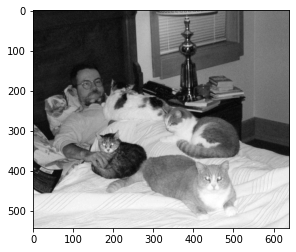

100%|██████████| 650/650 [00:09<00:00, 65.79it/s] 

1571


In [31]:
from tqdm import tqdm
DATADIR = "/content/drive/MyDrive/IMAGE_CLASSIFICATION/content/classes2/val/"

CATEGORIES = ["bed", "bear","bicycle"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path): 
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')  
        plt.show() 

        break 
    break 

val_data = []

def create_val_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  
                val_data.append([new_array, class_num])  
            except Exception as e: 
                pass
            

create_val_data()

print(len(val_data))

In [32]:
print(len(val_data))

1571


In [33]:
import random

random.shuffle(val_data)

In [34]:
X_val = []
y_val = []

for features,label in val_data:
    X_val.append(features)
    y_val.append(label)

print(X_val[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[ 55]
   [ 51]
   [ 53]
   ...
   [145]
   [138]
   [139]]

  [[105]
   [105]
   [105]
   ...
   [146]
   [141]
   [137]]

  [[ 57]
   [ 53]
   [ 58]
   ...
   [148]
   [143]
   [140]]

  ...

  [[ 35]
   [ 41]
   [ 35]
   ...
   [ 46]
   [ 26]
   [ 27]]

  [[ 40]
   [ 33]
   [ 32]
   ...
   [ 39]
   [ 24]
   [ 30]]

  [[ 27]
   [ 29]
   [ 28]
   ...
   [ 33]
   [ 29]
   [ 33]]]]


In [35]:
X_val = np.array(X_val).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X_val.shape)
y_val = np.array(y_val).reshape(-1,1)
print(y_val.shape)
train =tf.keras.utils.to_categorical(y_val, 3)

(1571, 256, 256, 1)
(1571, 1)


In [36]:
model.evaluate(X_val,y_val)

50/50 [==============================] - 8s 161ms/step - loss: 1.2051 - accuracy: 0.7008


[1.2050628662109375, 0.7008274793624878]

In [37]:
# import pickle

pickle_out = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/y_val.pickle","wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()

In [38]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/class_model.h5")

In [39]:
import pickle
pickle_in = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/X.pickle","rb")
X_val = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/IMAGE_CLASSIFICATION/y.pickle","rb")
y_val = pickle.load(pickle_in)

In [40]:
import tensorflow as tf
from tensorflow.keras.models import load_model
reconstructed_model = tf.keras.models.load_model("/content/drive/MyDrive/class_model.h5")

In [41]:
print(len(X_val))

2016


63/63 [==============================] - 10s 153ms/step
bear


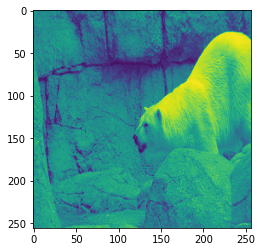

In [42]:
import matplotlib.pyplot as plt
import numpy as np
y=reconstructed_model.predict(X_val)
plt.imshow(X_val[0][:,:,0])
# y_max=max(y[0])
max_index=np.argmax(y[0])
if max_index==0:
  print("bed")
elif max_index==1:
  print("bear")
elif max_index==2:
  print("bicycle")
  


# print(y)

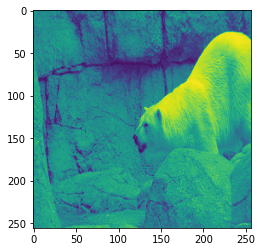

bear


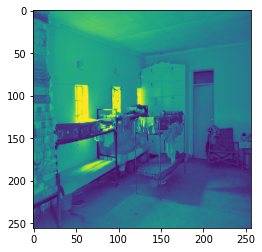

bed


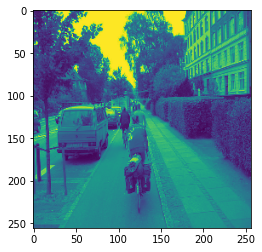

bicycle


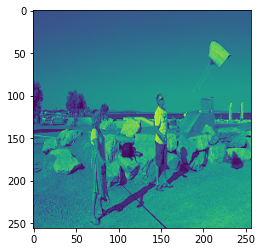

bicycle


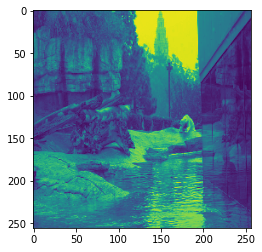

bear


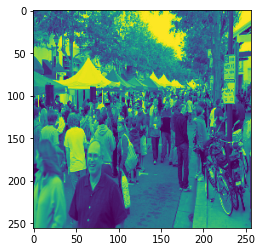

bicycle


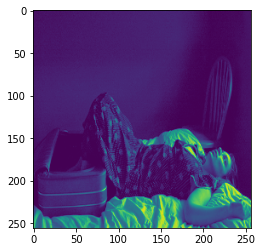

bed


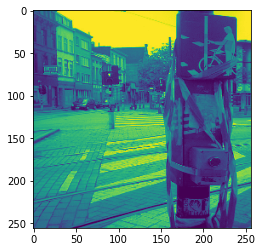

bicycle


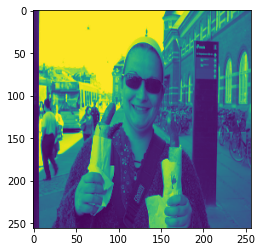

bicycle


In [43]:
import matplotlib.pyplot as plt
count=10
# y=reconstructed_model.predict(X_val)
for i in range(len(X_val)):
  count-=1
  # print(count)
  if count<=0:
    break
  # y=model.predict(i[:,:,0])
  plt.imshow(X_val[i][:,:,0])
  plt.show()
  # y_max=max(y[i])
  # max_index=y.index(y_max)
  max_index=np.argmax(y[i])
  if max_index==0:
    print("bed")
  elif max_index==1:
    print("bear")
  elif max_index==2:
    print("bicycle")
  
  


# print(y)